In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
new_test = pd.read_csv('./data/new_test.csv')
new_train = pd.read_csv('./data/new_train.csv')

## Feature Engineering
- change numerical columns to categorical
- add columns if necessary
- if large skews, change to log(variable)

Change categorical types (listed as numerical) to categorial -- convert to datatype object
- MSSubClass
- OverallQual
- OverallCond
- MoSold
- YrSold

In [6]:
# new_train['MSSubClass'] = str(new_train['MSSubClass'])
# new_train['OverallQual'] = str(new_train['OverallQual'])
# new_train['OverallCond'] = str(new_train['OverallCond'])
# new_train['MoSold'] = str(new_train['MoSold'])
# new_train['YrSold'] = str(new_train['YrSold'])

Add columns
- total sq ft
- total num bathrooms

In [ ]:
# new_train['TotalSF'] = new_train['TotalBsmtSF'] + new_train['1stFlrSF'] + new_train['2ndFlrSF']
# new_train['TotalBath'] = new_train['BsmtFullBath'] + new_train['BsmtHalfBath'] * 0.5 + new_train['FullBath'] + new_train['HalfBath'] * 0.5

In [22]:
features = new_train.drop(['SalePrice'], axis = 1)
salePrice = new_train['SalePrice']

# Multiple Linear Regression

Get ready for ridge, lasso, elastic net

In [23]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

### Ridge Regression

In [36]:
ridge.set_params(alpha=1.0)
ridge.fit(features, salePrice)
ridge.score(features, salePrice)

0.9144129057066819

In [37]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha)  
          ridge.fit(features, salePrice)
          intercepts.append(ridge.intercept_)
          coefs.append(ridge.coef_)
          R2.append(ridge.score(features, salePrice))  

Text(0.5,1,'Change of Ridge Slopes Varying Alpha')

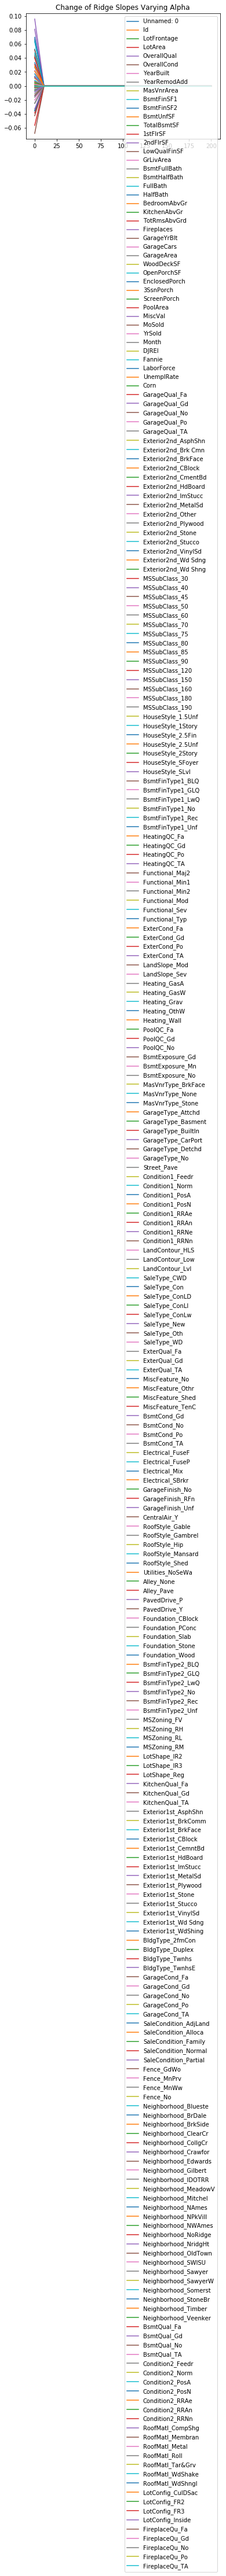

In [47]:
coefs = pd.DataFrame(np.array(coefs), columns=features.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Ridge Slopes Varying Alpha')

### Ridge Regression - log(price)

In [33]:
ridge.set_params(alpha=1.0)
ridge.fit(features, np.log(salePrice))
ridge.score(features, np.log(salePrice))

0.9326580059788978

In [39]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha)  
          ridge.fit(features, np.log(salePrice))
          intercepts.append(ridge.intercept_)
          coefs.append(ridge.coef_)
          R2.append(ridge.score(features, np.log(salePrice)))

In [40]:
R2

[0.9457649341815553,
 0.9198659099268675,
 0.9148463031855575,
 0.9113593606636394,
 0.9085894486878769,
 0.9062644978939189,
 0.9042516681316619,
 0.9024730750372092,
 0.9008779554341616,
 0.8994308887907988,
 0.8981059623774197,
 0.8968835485774297,
 0.8957483784128907,
 0.8946883190547743,
 0.8936935611650277,
 0.8927560582675499,
 0.8918691281087208,
 0.8910271619834473,
 0.8902254082330555,
 0.8894598080229332]

### Lasso Regression

In [46]:
lasso.set_params(alpha=1.0)
lasso.fit(features, salePrice)
lasso.score(features, salePrice)

/home/anisha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.9338348933736148

### Lasso Regression - log(price)

In [28]:
lasso.set_params(alpha=1.0)
lasso.fit(features, np.log(salePrice))
lasso.score(features, np.log(salePrice))

0.7718260070076614

In [44]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          lasso.set_params(alpha=alpha)  
          lasso.fit(features, np.log(salePrice))
          intercepts.append(lasso.intercept_)
          coefs.append(lasso.coef_)
          R2.append(lasso.score(features, np.log(salePrice)))

In [45]:
R2

[0.902982613916977,
 0.6624498098133242,
 0.6145553409130453,
 0.5799572901763426,
 0.5327680957989718,
 0.4853026977190715,
 0.4347311483587448,
 0.37496428836885887,
 0.32816389198204843,
 0.28331498479728345,
 0.23319022790581356,
 0.1777893434760689,
 0.1171122403481678,
 0.06503392215886517,
 0.0648454660088209,
 0.06464305024219374,
 0.06442667485898323,
 0.06419633985918949,
 0.0639520452428125,
 0.06369379100985229]

## Elastic Net

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
elasticnet.fit(features, np.log(salePrice))
print(r'The R^2 is %.2f' %(elasticnet.score(features, np.log(salePrice))))

The R^2 is 0.82
